In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv',index_col='FullDate',parse_dates=True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [2]:
print(df.shape)
df.isna().sum()

(92016, 4)


Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [3]:
df.describe(include='all')

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [4]:
# resampling daily method
df2 = df.copy()
ddf = df2.resample('D').sum() #ddf = daily dataframe
print(ddf.shape)
ddf.head()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [5]:
roll_mean = ddf.rolling(window=30).mean()
roll_std = ddf.rolling(window=30).std()

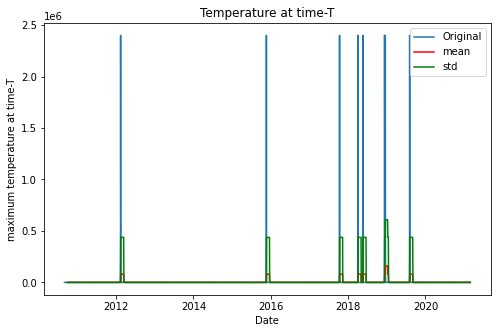

In [6]:
plt.figure(figsize=(8,5))
plt.plot(ddf.index, ddf.Tmax, label = 'Original')
plt.plot(roll_mean.Tmax, color = 'red', label = 'mean')
plt.plot(roll_std.Tmax, color = 'green', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel('maximum temperature at time-T')
plt.title('Temperature at time-T')
plt.show()

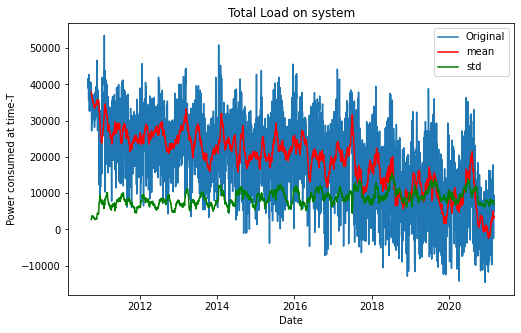

In [7]:
plt.figure(figsize=(8,5))
plt.plot(ddf.index, ddf.SysLoad, label = 'Original')
plt.plot(roll_mean.SysLoad, color = 'red', label = 'mean')
plt.plot(roll_std.SysLoad, color = 'green', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel('Power consumed at time-T')
plt.title('Total Load on system')
plt.show()

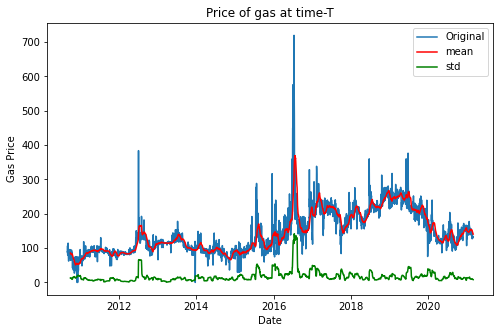

In [8]:
plt.figure(figsize=(8,5))
plt.plot(ddf.index, ddf.GasPrice, label = 'Original')
plt.plot(roll_mean.GasPrice, color = 'red', label = 'mean')
plt.plot(roll_std.GasPrice, color = 'green', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel('Gas Price')
plt.title('Price of gas at time-T')
plt.show()

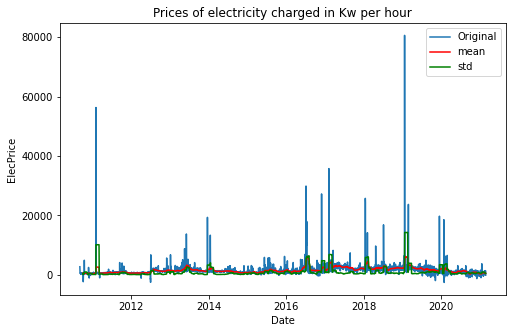

In [9]:
plt.figure(figsize=(8,5))
plt.plot(ddf.index, ddf.ElecPrice, label = 'Original')
plt.plot(roll_mean.ElecPrice, color = 'red', label = 'mean')
plt.plot(roll_std.ElecPrice, color = 'green', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel('ElecPrice')
plt.title('Prices of electricity charged in Kw per hour')
plt.show()

# Stationary Test
+  ADF test

In [13]:
 from statsmodels.tsa.stattools import adfuller

In [10]:
def stationary_test(d_set):
  dftest = adfuller(d_set, autolag='AIC')
  adf = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lags', '# Observations'])

  for key, value in dftest[4].items():
    adf['Critical Value (%s)' %key] = value
  print(adf)

  p = adf['p-value']
  if p <= 0.05:
    print("\n Series is Stationary")
  else:
    print("\n Series is Non-Stationary")

In [14]:
stationary_test(ddf.Tmax)

Test Statistics          -20.766001
p-value                    0.000000
# Lags                     6.000000
# Observations          3827.000000
Critical Value (1%)       -3.432060
Critical Value (5%)       -2.862296
Critical Value (10%)      -2.567172
dtype: float64

 Series is Stationary


In [15]:
stationary_test(ddf.SysLoad)

Test Statistics           -3.690159
p-value                    0.004254
# Lags                    30.000000
# Observations          3803.000000
Critical Value (1%)       -3.432071
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567175
dtype: float64

 Series is Stationary


In [16]:
stationary_test(ddf.GasPrice)

Test Statistics           -2.902767
p-value                    0.045027
# Lags                    27.000000
# Observations          3806.000000
Critical Value (1%)       -3.432069
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567174
dtype: float64

 Series is Stationary


In [17]:
stationary_test(ddf.ElecPrice)

Test Statistics        -8.269054e+00
p-value                 4.848818e-13
# Lags                  2.000000e+01
# Observations          3.813000e+03
Critical Value (1%)    -3.432066e+00
Critical Value (5%)    -2.862298e+00
Critical Value (10%)   -2.567174e+00
dtype: float64

 Series is Stationary


# Further Instructions (14-16)

Using the daily sampling rate (sum), divide the data into a 
train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [18]:
ddf.reset_index(inplace=True)
data = ddf[['FullDate', 'ElecPrice']]
print(data.shape)
data.head()

(3834, 2)


,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [19]:
data = data.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
data.head() 

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


# Spliting the data

In [20]:
train = data[:2757]
test = data[2757:]
print(train.shape)
print(test.shape)

(2757, 2)
(1077, 2)


In [21]:
model = Prophet(daily_seasonality=True)
model.fit(train) 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/10o5vqno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/cf6ck44t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3477', 'data', 'file=/tmp/tmpe7clmdr8/10o5vqno.json', 'init=/tmp/tmpe7clmdr8/cf6ck44t.json', 'output', 'file=/tmp/tmpk2tbkhdi/prophet_model-20221003041546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
predictions = model.predict(test)

In [23]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4210.287161,78.993116,5030.208838,4210.287161,4210.287161,-1674.972252,-1674.972252,-1674.972252,-1519.218463,...,9.746355,9.746355,9.746355,-165.500145,-165.500145,-165.500145,0.0,0.0,0.0,2535.314909
1,2018-03-21,4211.100590,288.267228,5011.654997,4211.100590,4211.100590,-1522.383711,-1522.383711,-1522.383711,-1519.218463,...,159.375608,159.375608,159.375608,-162.540856,-162.540856,-162.540856,0.0,0.0,0.0,2688.716879
2,2018-03-22,4211.914019,319.875577,5020.785588,4211.914019,4211.914019,-1424.095695,-1424.095695,-1424.095695,-1519.218463,...,257.140553,257.140553,257.140553,-162.017786,-162.017786,-162.017786,0.0,0.0,0.0,2787.818324
3,2018-03-23,4212.727448,244.050205,5132.910703,4212.727448,4212.727448,-1632.705017,-1632.705017,-1632.705017,-1519.218463,...,50.279187,50.279187,50.279187,-163.765742,-163.765742,-163.765742,0.0,0.0,0.0,2580.022431
4,2018-03-24,4213.540878,-116.577607,4717.537123,4213.540878,4213.540878,-1958.239415,-1958.239415,-1958.239415,-1519.218463,...,-271.477866,-271.477866,-271.477866,-167.543086,-167.543086,-167.543086,0.0,0.0,0.0,2255.301463


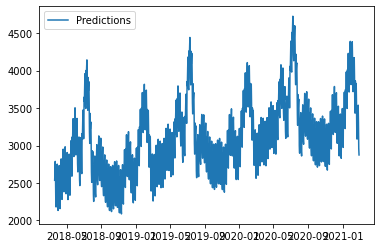

In [24]:
plt.plot(predictions.ds, predictions.yhat, label = 'Predictions')
plt.legend()
plt.show()

# Mean Absolute Percentage Error (MAPE)

In [26]:
y = np.array(test.y)
yp = np.array(predictions.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 548.82


# ROOT MEAN SQUARE

In [27]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(predictions['yhat'])))
print('The Root Mean Square Error(rmse) value is : %s' %(round(rmse,2)))

The Root Mean Square Error(rmse) value is : 3216.9


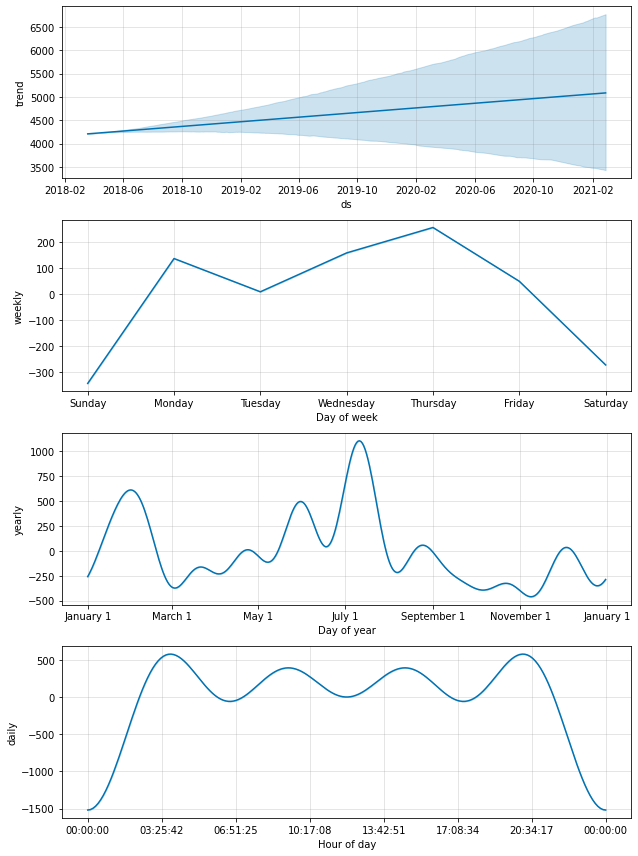

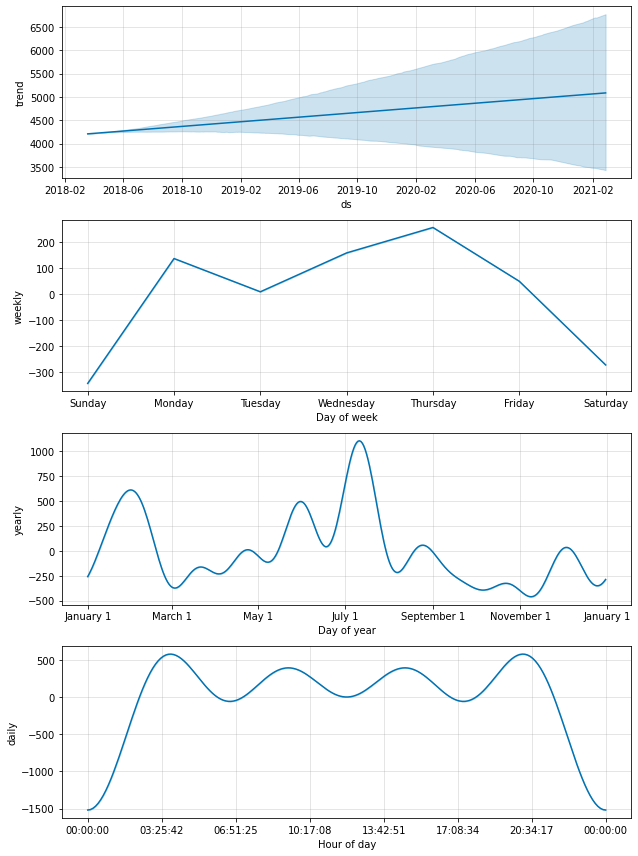

In [28]:
model.plot_components(predictions)

# Further Instructions (17-19)
# Multivariate Time Series Forecasting with Facebook Prophet

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

In [30]:
ddf.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [31]:
ddf.reset_index(inplace=True)
df3 = ddf
print(df3.shape)
df3.head()

(3834, 6)


,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [32]:
df3 = df3.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                     'Tmax':'add2',
                                    'GasPrice':'add3'})

In [33]:
train = df3[:2757]
test = df3[2757:]
print(train.shape)
print(test.shape)

(2757, 6)
(1077, 6)


In [34]:
multi_model = Prophet(daily_seasonality=True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/lp867krt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/v55ns_mx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60771', 'data', 'file=/tmp/tmpe7clmdr8/lp867krt.json', 'init=/tmp/tmpe7clmdr8/v55ns_mx.json', 'output', 'file=/tmp/tmpr5_2hwd4/prophet_model-20221003042144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# MEAN ABSOLUTE PERCENTAGE ERROR

In [35]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 234.31


# Root Mean Square Error

In [36]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y,yp))
print('The Root Mean Square Error (RMSE) value Is : {}'.format(round(rmse,2)))

The Root Mean Square Error (RMSE) value Is : 2710.29


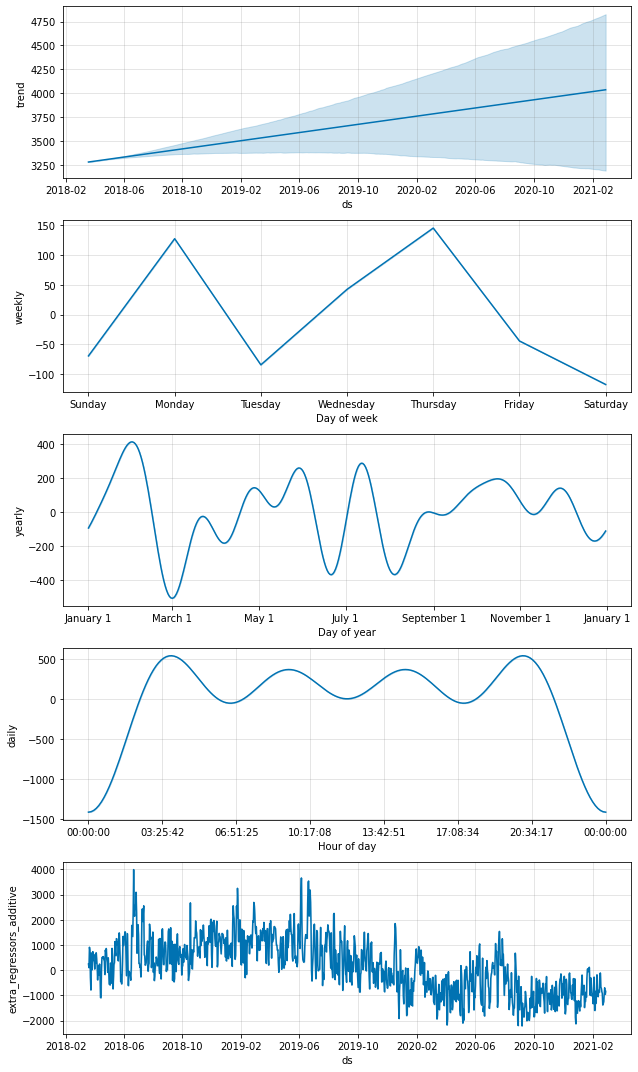

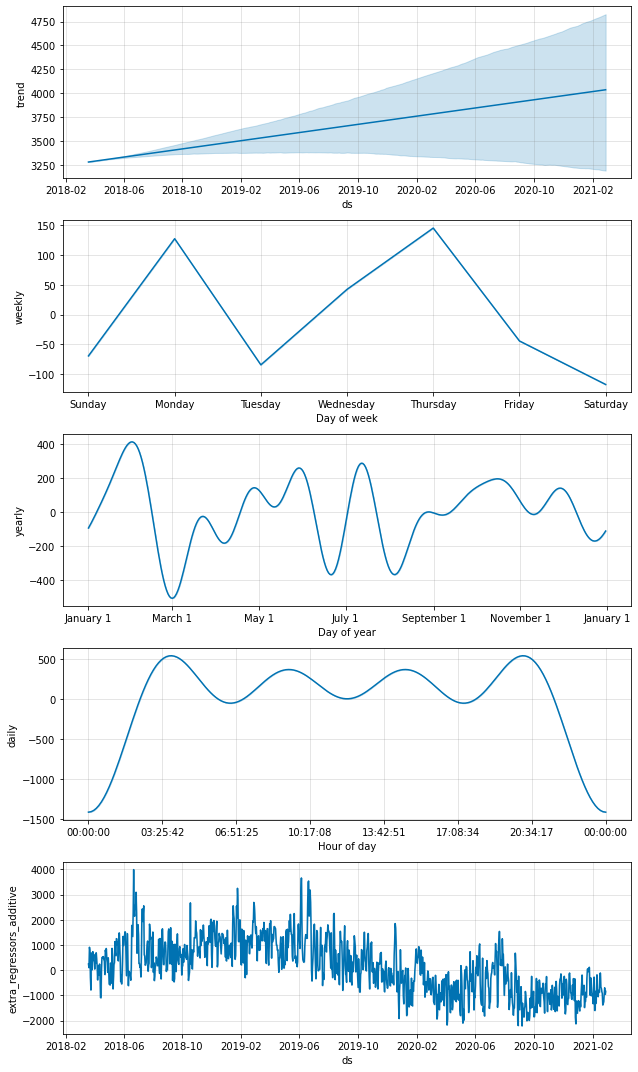

In [38]:
multi_model.plot_components(y_pred)

# DROPING Tmax

In [42]:
ddf.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [43]:
df4 = ddf.drop('Tmax', axis = 1)
df4.shape

(3834, 5)

In [44]:
df4 = df4.rename(columns = {'FullDate':'ds',
                                    'ElecPrice':'y',
                                    'SysLoad':'add1',
                                    'GasPrice':'add2'})

In [45]:
df4.head()

,index,ds,add1,add2,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [46]:
train = df4[:2757]
test = df4[2757:]
print(train.shape)
print(test.shape)

(2757, 5)
(1077, 5)


In [47]:
multi_model = Prophet(daily_seasonality=True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/bgin8_pk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe7clmdr8/nhq5drai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11192', 'data', 'file=/tmp/tmpe7clmdr8/bgin8_pk.json', 'init=/tmp/tmpe7clmdr8/nhq5drai.json', 'output', 'file=/tmp/tmp2qv6a7ei/prophet_model-20221003042843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# MEAN ABSOLUTE PERCENTAGE ERROR

In [48]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 233.02
